<a href="https://colab.research.google.com/github/ImAli0/AI_Application/blob/main/22-DBSCAN/DBSCAN_Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Hyperparameters


## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [2]:
two_blobs = pd.read_csv('/content/cluster_two_blobs.csv')
two_blobs_out = pd.read_csv('/content/cluster_two_blobs_outliers.csv')

two_blobs

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
995,-9.895227,-6.644544
996,-9.544007,-6.060362
997,0.713958,1.560460
998,0.954444,0.889178


In [3]:
two_blobs_out

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


<Axes: xlabel='X1', ylabel='X2'>

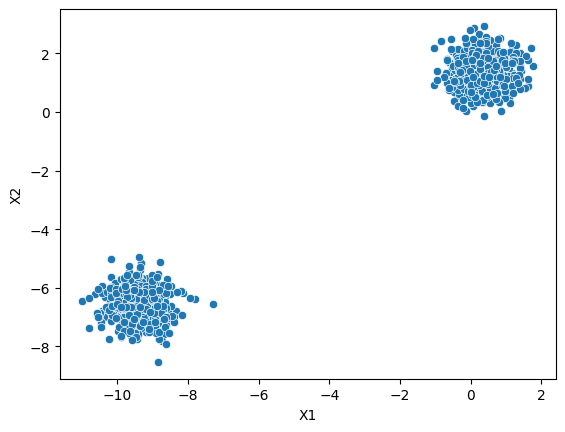

In [4]:
sns.scatterplot(two_blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

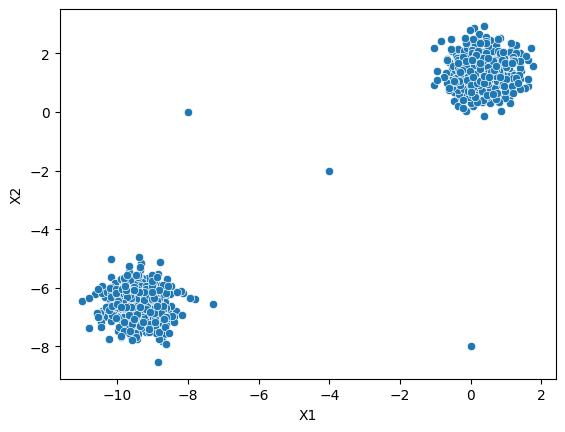

In [5]:
sns.scatterplot(two_blobs_out, x='X1', y='X2')

## DBSCAN Label Prediction

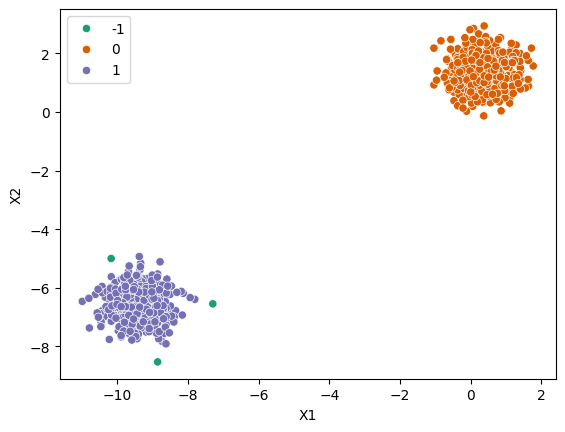

In [6]:
def display_categories(model, data):
  labels = model.fit_predict(data)
  sns.scatterplot(data, x='X1', y='X2', hue=labels, palette='Dark2')

dbscan = DBSCAN()
display_categories(dbscan, two_blobs)

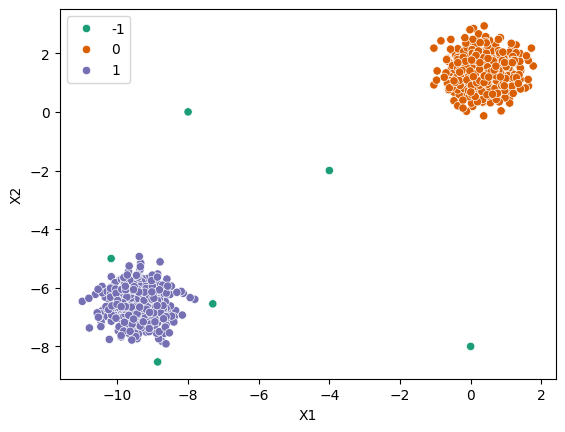

In [7]:
display_categories(dbscan, two_blobs_out)

## Epsilon

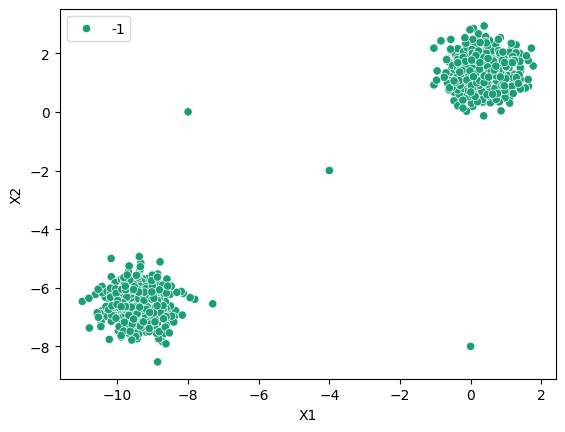

In [8]:
dbscan = DBSCAN(0.01)
display_categories(dbscan, two_blobs_out)

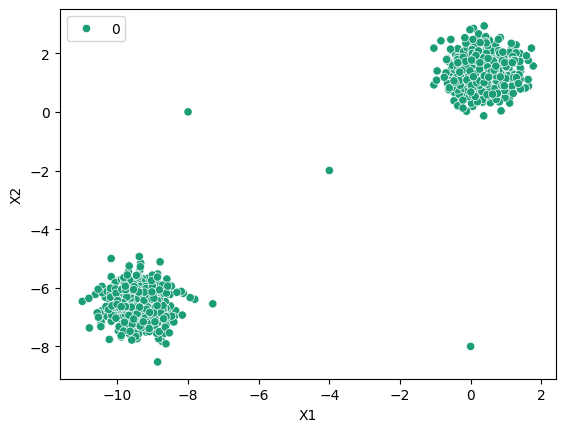

In [9]:
dbscan = DBSCAN(10)
display_categories(dbscan, two_blobs_out)

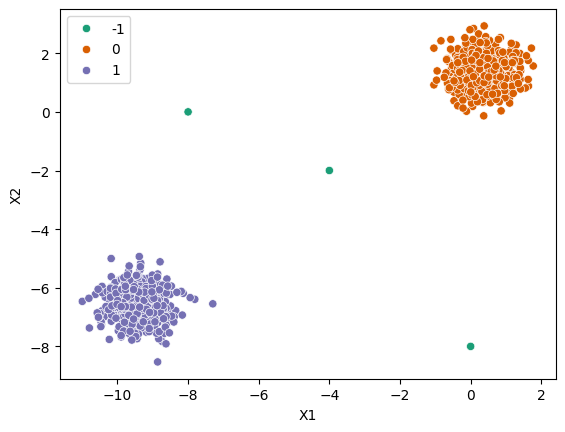

In [10]:
dbscan = DBSCAN(1)
display_categories(dbscan, two_blobs_out)

In [11]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [12]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [13]:
np.sum(dbscan.labels_==-1)

3

In [14]:
100 * np.sum(dbscan.labels_==-1)/len(dbscan.labels_)

0.29910269192422734

Text(0.5, 0, 'Epsilon Value')

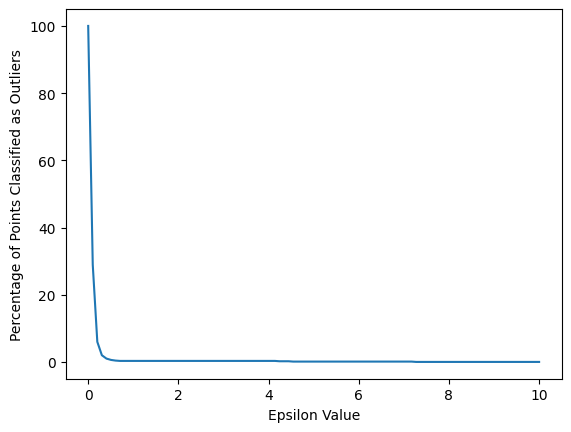

In [16]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_out)

    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

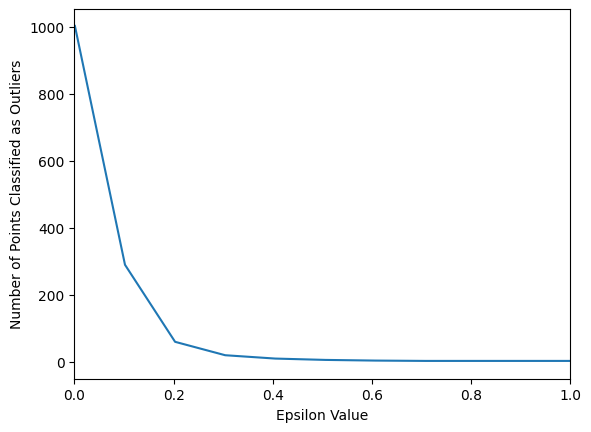

In [17]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

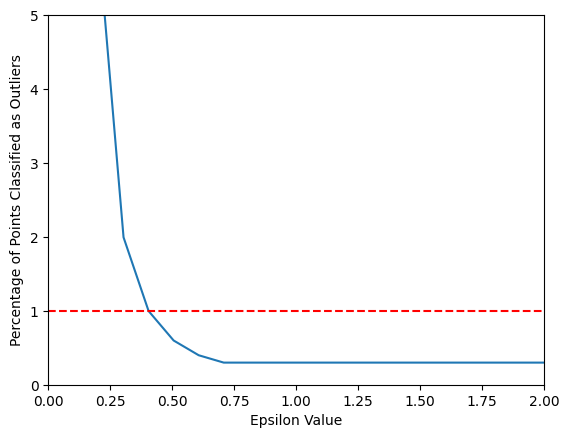

In [18]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

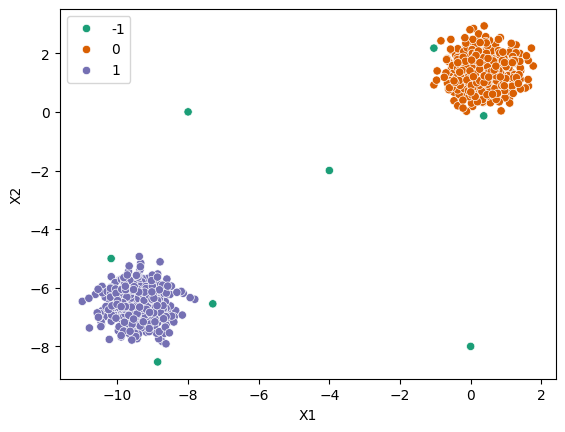

In [20]:
dbscan = DBSCAN(eps = 0.425)
display_categories(dbscan, two_blobs_out)

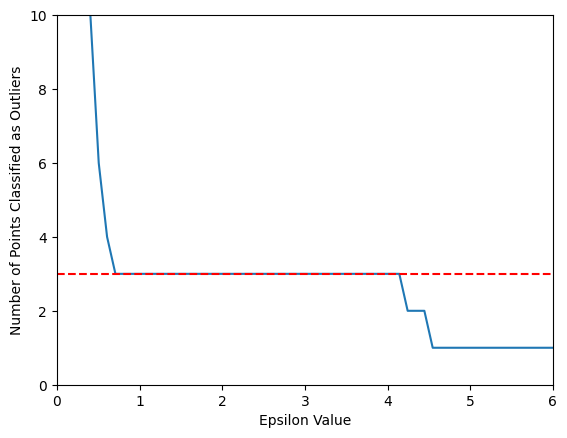

In [21]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

In [23]:
outlier_percent = []

for n in np.arange(1,100):

    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_out)

    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

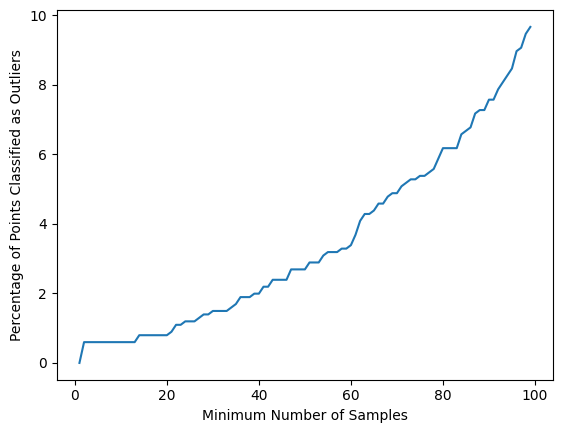

In [24]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

In [25]:
two_blobs_out.shape

(1003, 2)

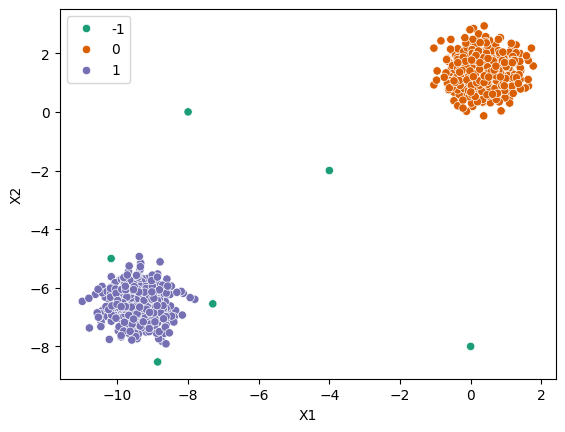

In [26]:
num_dim = two_blobs_out.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_out)

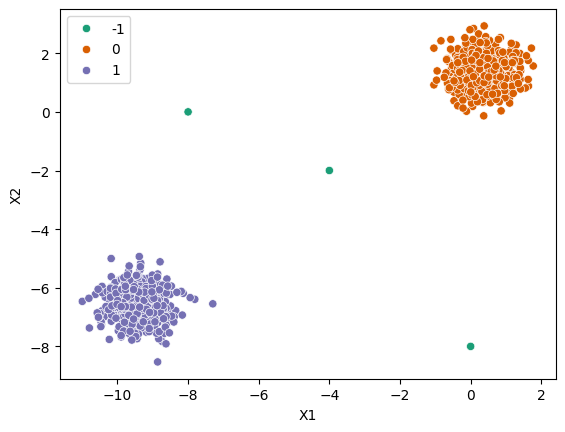

In [28]:
num_dim = two_blobs_out.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_out)

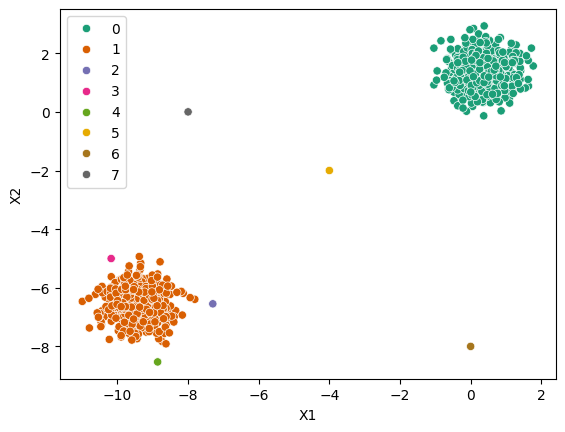

In [29]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_out)

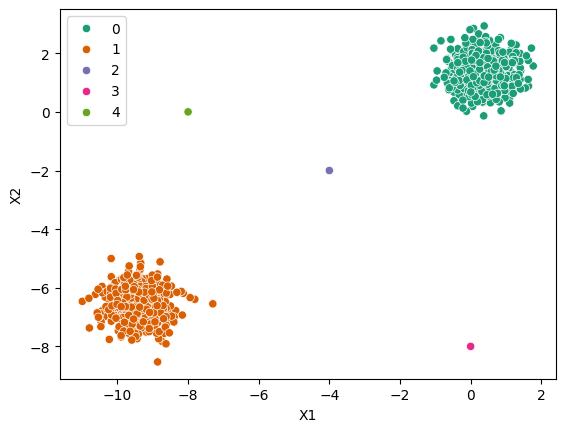

In [30]:
dbscan = DBSCAN(eps=0.7,min_samples=1)
display_categories(dbscan,two_blobs_out)